# Milestone 3

- Section 1: EDA
    - 1.1: Descriptive statistics, information about the data, distribution of data
    - 1.2: Average area of deforestation by year, plot of the changes in average
    - 1.3: Difference in deforestation by year, plot of difference between area from previous year
    
- Section 2: Baseline Model
    - Time Series 
    - Linear Regression

# Section 1: EDA

### 1.1 Information About Data

In [1]:
import pandas as pd
path = '/Users/toriwright/Downloads/Amazon-Deforestration-Prediction-main/Datasets/brazil_deforestration_by_state_formatted.csv'
data=pd.read_csv(path)


In [2]:
data.head()

,year,areakm,municipality,geocode_ibge,state
0,2007,1005.901508,Acrelandia,1200013,Acre
1,2008,1029.568595,Acrelandia,1200013,Acre
2,2009,1042.506828,Acrelandia,1200013,Acre
3,2010,1053.838906,Acrelandia,1200013,Acre
4,2011,1069.777544,Acrelandia,1200013,Acre


What are the names of all the municipalities and how many are there?

In [3]:
data['municipality'].unique()

array(['Acrelandia', 'Assis Brasil', 'Brasileia', 'Bujari', 'Capixaba',
       'Cruzeiro do Sul', 'Epitaciolandia', 'Feijo', 'Jordao',
       'Mancio Lima', 'Manoel Urbano', 'Marechal Thaumaturgo',
       'Placido de Castro', 'Porto Acre', 'Porto Walter', 'Rio Branco',
       'Rodrigues Alves', 'Santa Rosa do Purus', 'Sena Madureira',
       'Senador Guiomard', 'Tarauaca', 'Xapuri', 'Amapa', 'Calcoene',
       'Cutias', 'Ferreira Gomes', 'Itaubal', 'Laranjal do Jari',
       'Macapa', 'Mazagao', 'Oiapoque', 'Pedra Branca do Amapari',
       'Porto Grande', 'Pracuuba', 'Santana', 'Serra do Navio',
       'Tartarugalzinho', 'Vitoria do Jari', 'Alvaraes', 'Amatura',
       'Anama', 'Anori', 'Apui', 'Atalaia do Norte', 'Autazes',
       'Barcelos', 'Barreirinha', 'Benjamin Constant', 'Beruri',
       'Boa Vista do Ramos', 'Boca do Acre', 'Borba', 'Caapiranga',
       'Canutama', 'Carauari', 'Careiro', 'Careiro da Varzea', 'Coari',
       'Codajas', 'Eirunepe', 'Envira', 'Fonte Boa', 'Guaja

In [4]:
data['municipality'].nunique()

412

There are 412 unique municipalities which are listed above.

What are the names of all the states and how many are there?

In [5]:
data['state'].unique()

array(['Acre', 'Amapa', 'Amazonas', 'Maranhao', 'Mato Grosso', 'Rondonia',
       'Roraima', 'Tocantins'], dtype=object)

In [6]:
data['state'].nunique()

8

There are 8 different states which are listed above.

Sort the data by time (ascending)

In [7]:
data.sort_values(by=['year'])

,year,areakm,municipality,geocode_ibge,state
0,2007,1005.901508,Acrelandia,1200013,Acre
2704,2007,68.882225,Paco do Lumiar,2107506,Maranhao
4528,2007,150.828449,Reserva do Cabacal,5107156,Mato Grosso
4064,2007,237.488863,Lucas do Rio Verde,5105259,Mato Grosso
5200,2007,1486.386657,Costa Marques,1100080,Rondonia
...,...,...,...,...,...
4767,2022,342.400689,Serra Nova Dourada,5107883,Mato Grosso
1663,2022,1800.440157,Alto Alegre do Pindare,2100477,Maranhao
4783,2022,2643.463789,Sinop,5107909,Mato Grosso
6223,2022,307.013326,Carmolandia,1703883,Tocantins


The data spans from 2007 to 2022.

Now lets look at the data for each state.

In [8]:
################
#To look at EDA for diffrent states, run this cell and input the state you wish to analyze
###############

state= input('State: ')
state_data=data[data['state']==state]
state_data.sort_values(by=['year'])

State: Acre


,year,areakm,municipality,geocode_ibge,state
0,2007,1005.901508,Acrelandia,1200013,Acre
32,2007,1203.149826,Brasileia,1200104,Acre
272,2007,67.116349,Santa Rosa do Purus,1200435,Acre
256,2007,409.719071,Rodrigues Alves,1200427,Acre
48,2007,1116.955936,Bujari,1200138,Acre
...,...,...,...,...,...
255,2022,3062.655247,Rio Branco,1200401,Acre
271,2022,527.223835,Rodrigues Alves,1200427,Acre
287,2022,114.865099,Santa Rosa do Purus,1200435,Acre
319,2022,1744.081345,Senador Guiomard,1200450,Acre


Text(0, 0.5, 'Frequency')

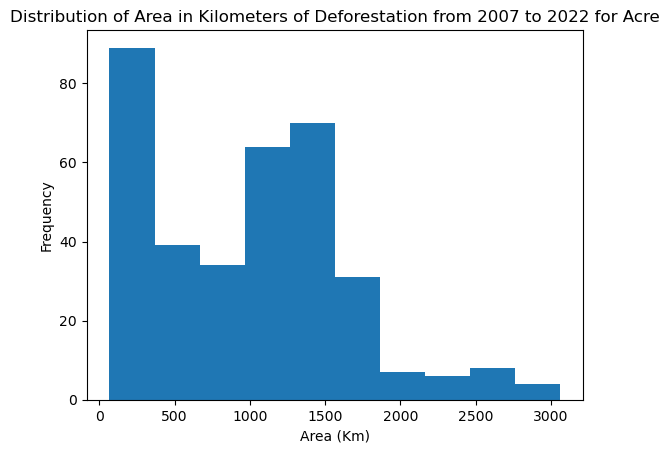

In [9]:
import matplotlib.pyplot as plt
plt.hist(state_data['areakm'])
plt.title('Distribution of Area in Kilometers of Deforestation from 2007 to 2022 for {}'.format(state))
plt.xlabel('Area (Km)')
plt.ylabel('Frequency')

In [10]:
state_data['areakm'].describe()

count     352.000000
mean      988.131688
std       656.949701
min        67.116349
25%       345.975311
50%      1056.185245
75%      1398.961778
max      3062.655247
Name: areakm, dtype: float64

### 1.2: Average Area of Deforestation (Km) by Year 

In [11]:
average_km = state_data.groupby('year')['areakm'].mean()

average_km = average_km.to_frame()

In [12]:
average_km=average_km.reset_index()
average_km

,year,areakm
0,2007,882.440254
1,2008,895.565653
2,2009,902.917072
3,2010,914.974482
4,2011,928.408634
5,2012,940.704718
6,2013,949.806710
7,2014,965.651654
8,2015,975.781423
9,2016,992.425323


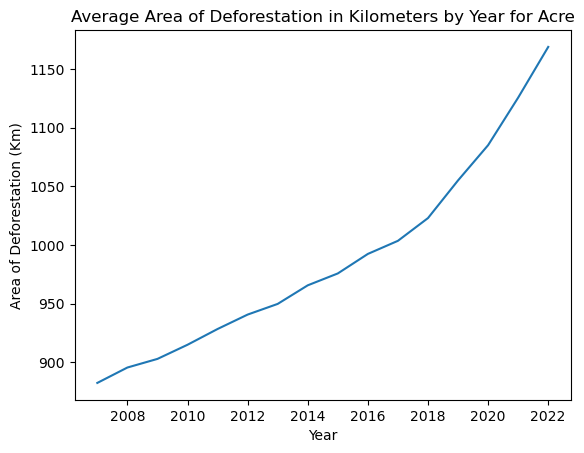

In [13]:
plt.plot(average_km.year,average_km.areakm)
plt.xlabel('Year')
plt.ylabel('Area of Deforestation (Km)')
plt.title('Average Area of Deforestation in Kilometers by Year for {}'.format(state))
plt.show()

Based on the plot, we can say that there is an upwards trend in average area of deforestation by year. The function is monotonically increasing.

### 1.3: Difference in Area of Deforestation by Year

Find the difference in area of deforestation in kilometers from the previous year.

$ Area_{n+1}- Area_{n} $

In [14]:
#calculates the diffrenece in area from previous year
area_vals = average_km['areakm'].values
diff_area = area_vals[1:] - area_vals[:-1]
diff_area = pd.DataFrame(diff_area, columns=['diff_area'])

In [15]:
diff_area['year'] = range(2008, 2023)

In [16]:
diff_area

,diff_area,year
0,13.125399,2008
1,7.351419,2009
2,12.057410,2010
3,13.434153,2011
4,12.296084,2012
5,9.101991,2013
6,15.844944,2014
7,10.129769,2015
8,16.643900,2016
9,11.166071,2017


Each entry in the above dataframe shows the diffrence in area of deforestation from the previous year.

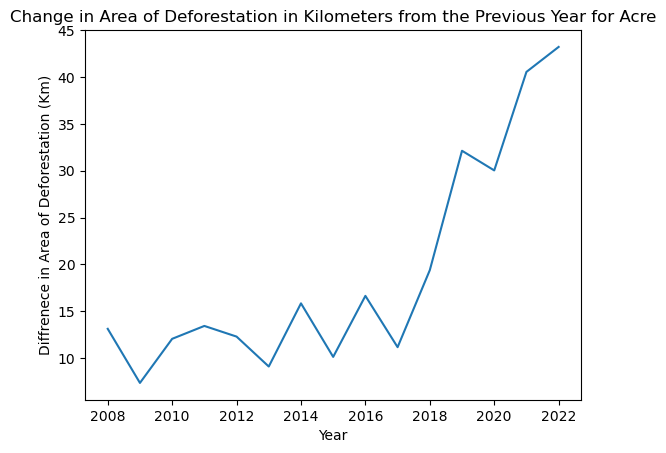

In [17]:
plt.plot(diff_area.year,diff_area.diff_area)
plt.xlabel('Year')
plt.ylabel('Diffrenece in Area of Deforestation (Km)')
plt.title('Change in Area of Deforestation in Kilometers from the Previous Year for {}'.format(state))
plt.show()

From this plot, we can see that the area of deforestation has skyrocketed in previous years. From 2018, the area of deforestation has steadily incresed and shows an upwards trend. 

# Section 2: Baseline Model

In [18]:
series = state_data.groupby('year')['areakm'].mean()
# Create a Series with a DatetimeIndex
data = pd.Series([1, 2, 3], index=pd.date_range('2022-01-01', periods=3, freq='D'))

In [19]:
series

year
2007     882.440254
2008     895.565653
2009     902.917072
2010     914.974482
2011     928.408634
2012     940.704718
2013     949.806710
2014     965.651654
2015     975.781423
2016     992.425323
2017    1003.591394
2018    1022.981667
2019    1055.112554
2020    1085.145100
2021    1125.693047
2022    1168.907323
Name: areakm, dtype: float64

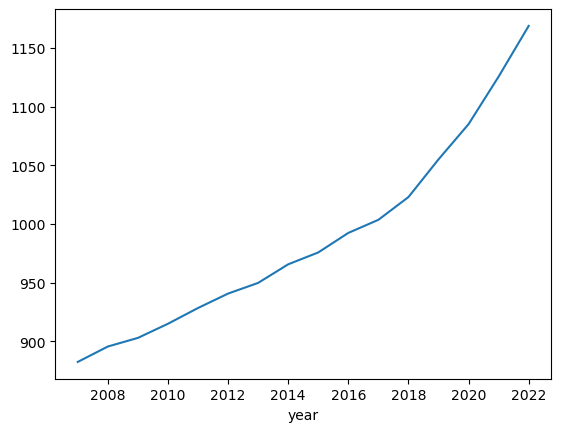

In [20]:
from matplotlib import pyplot 

series.plot()
pyplot.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

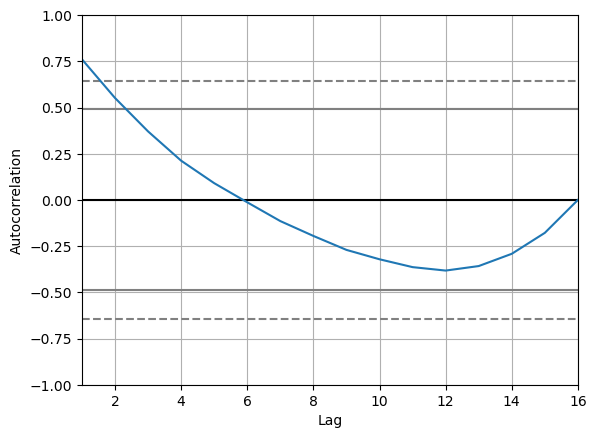

In [21]:
#autocorrelation plot
pd.plotting.autocorrelation_plot(series)

There is a high degree of autocorrelation between consecutive observations. The data is not random and has some relationship.

### Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression 
import numpy
X = [i for i in range(0, len(series))]
X = numpy.reshape(X, (len(X), 1))
y = series.values
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [23]:
# calculate trend
trend = model.predict(X)

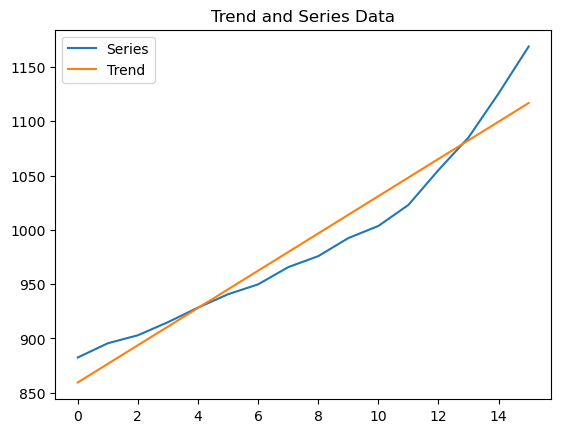

In [24]:
# calculate trend
trend = model.predict(X)
# plot trend
pyplot.plot(y, label='Series')
pyplot.plot(trend, label = 'Trend')
plt.legend(loc="upper left")
pyplot.title('Trend and Series Data')
pyplot.show()

In [25]:
# split into train and test sets
X = series.values
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

In [26]:
from statsmodels.tsa.arima.model import ARIMA
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=1015.640392, expected=1022.981667
predicted=1036.812369, expected=1055.112554
predicted=1080.939662, expected=1085.145100
predicted=1114.024757, expected=1125.693047
predicted=1163.473834, expected=1168.907323


/Users/toriwright/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/toriwright/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/toriwright/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [27]:
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(5,1,1))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts

predicted=1018.392445, expected=1022.981667


/Users/toriwright/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/toriwright/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/toriwright/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1034.038761, expected=1055.112554
predicted=1079.775598, expected=1085.145100
predicted=1113.474056, expected=1125.693047
predicted=1164.355525, expected=1168.907323


In [28]:
from sklearn.metrics import mean_squared_error 
from math import sqrt
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 11.524


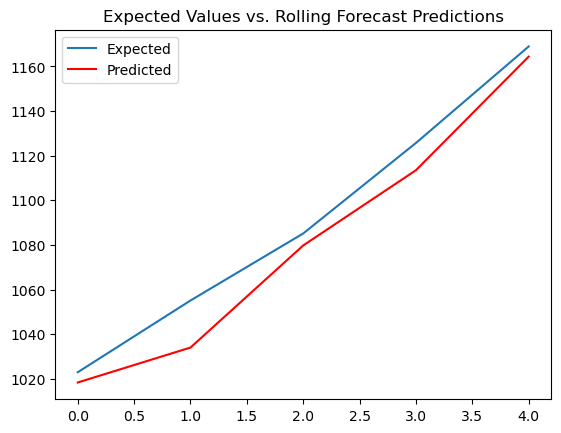

In [29]:
# plot forecasts against actual outcomes
pyplot.plot(test, label='Expected')
pyplot.plot(predictions, color='red', label='Predicted')
pyplot.title('Expected Values vs. Rolling Forecast Predictions')
plt.legend(loc="upper left")
pyplot.show()